### Import dependencies

In [2]:

from IPython.display import display_html
from PIL import Image as PILImage
from openpyxl import load_workbook
from io import BytesIO
import cv2

### Documents

Documents can be either an image or a PDF file. Check README for supported formats.

#### Image

In [3]:
from img2table.document import Image

img_path = "table6.png"

# Definition of image from path
img_from_path = Image(src=img_path)

# Definition of image from bytes
with open(img_path, 'rb') as f:
    img_bytes = f.read()
img_from_bytes = Image(src=img_bytes)

# Definition of image from file-like object
img_from_file_like = Image(src=BytesIO(img_bytes))

#### PDF

In [3]:
from img2table.document import PDF

pdf_path = "data/tables.pdf"

# Definition of PDF from path
# The optional pages argument enables the extraction of table on specific pages of the PDF
pdf_from_path = PDF(src=pdf_path, pages=[0, 1])

# Definition of PDF from bytes
with open(pdf_path, 'rb') as f:
    pdf_bytes = f.read()
pdf_from_bytes = PDF(src=pdf_bytes)

# Definition of PDF from file-like object
pdf_from_file_like = PDF(src=BytesIO(pdf_bytes))

time: 16 ms (started: 2023-12-16 17:32:46 +01:00)


### OCR instances

<code>img2table</code> provides supports for several OCR tools and services :
  * Tesseract
  * PaddleOCR
  * EasyOCR
  * docTR
  * Google Vision
  * AWS Textract
  * Azure Cognitive Services
  
For all OCRs except Tesseract, a specific installation is needed. Check README for relevant instructions.

In [4]:
# Tesseract OCR
from img2table.ocr import TesseractOCR

tesseract_ocr = TesseractOCR(n_threads=1, lang="eng")

# PaddleOCR
from img2table.ocr import PaddleOCR

paddle_ocr = PaddleOCR(lang="en", kw={"use_dilation": True})

# EasyOCR
from img2table.ocr import EasyOCR

easyocr = EasyOCR(lang=["en"], kw={"gpu": False})

# docTR
from img2table.ocr import DocTR

doctr = DocTR(detect_language=True, kw={"detect_orientation": True})

# Google Vision OCR
from img2table.ocr import VisionOCR

vision_ocr = VisionOCR(api_key="***")

# AWS Textract OCR
from img2table.ocr import TextractOCR

textract_ocr = TextractOCR(aws_access_key_id="***",
                           aws_secret_access_key="***",
                           aws_session_token="***",
                           region="eu-west-1")

# Azure Cognitive Services OCR
from img2table.ocr import AzureOCR

azure_ocr = AzureOCR(endpoint="abc.azure.com",
                           subscription_key="***")

OSError: Tesseract not found in environment. Check variables and PATH

### Table identification

For a document object (image or pdf), the <code>extract_tables</code> method can be called to perform table identification.<br>
A list/dict of <code>ExtractedTable</code> objects is returned.

In [7]:
img = Image(src="bloomberg_table.png")

# Extract tables
extracted_tables = img.extract_tables()

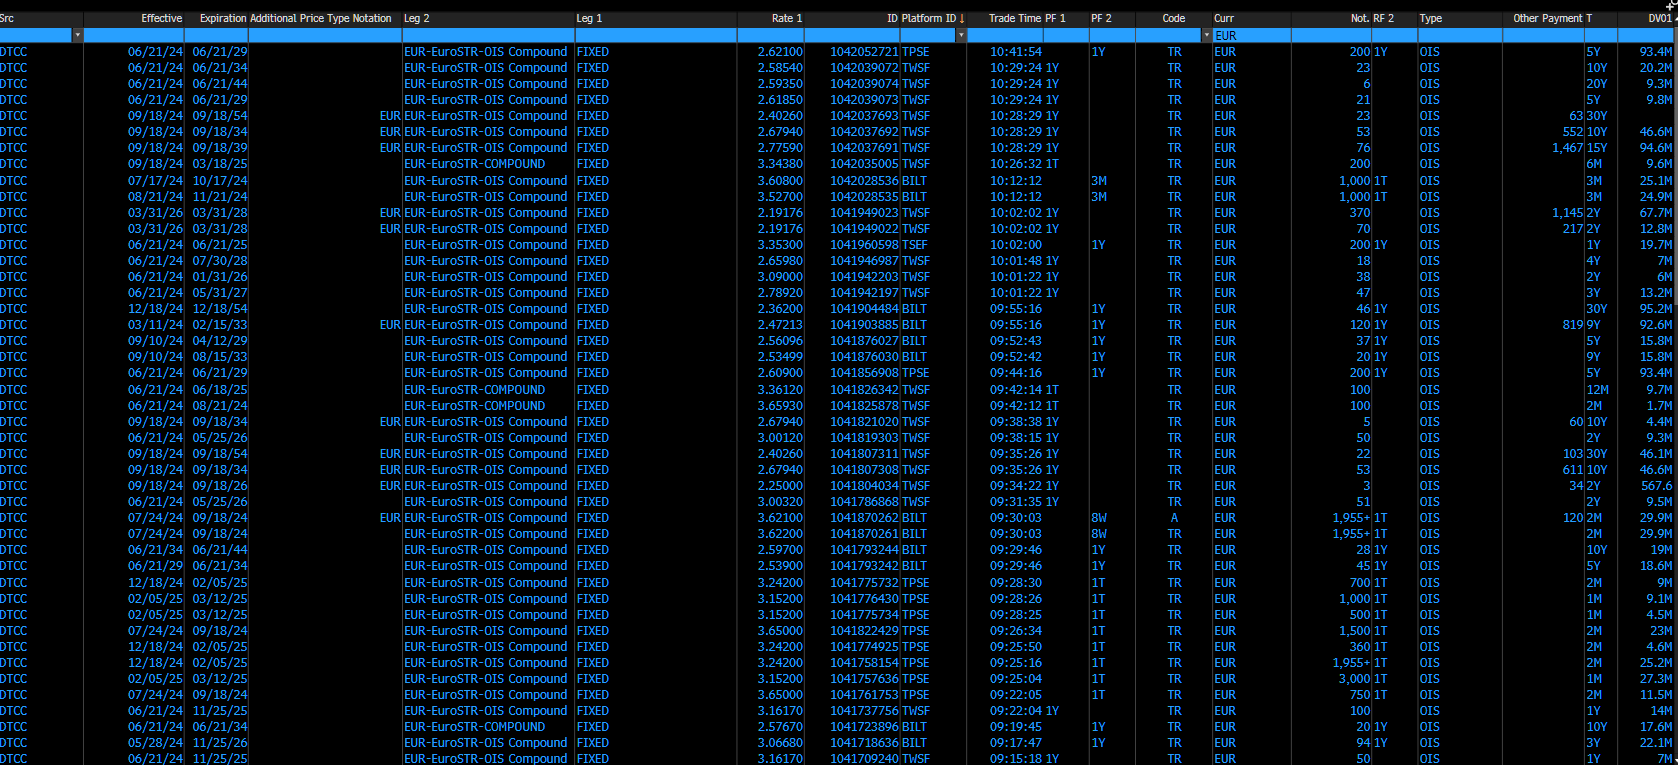

In [11]:
# Display extracted tables
table_img = cv2.imread("bloomberg_table.png")

for table in extracted_tables:
    for row in table.content.values():
        for cell in row:
            cv2.rectangle(table_img, (cell.bbox.x1, cell.bbox.y1), (cell.bbox.x2, cell.bbox.y2), (255, 0, 0), 2)
            
PILImage.fromarray(table_img)

In [12]:
print(extracted_tables)

[]


### Table extraction

If an ocr instance is provided to the <code>extract_table</code> method, cells content will be infered from the OCR result.<br>
A <code>pd.DataFrame</code> representation of the extracted tables can be accessed via the <code>df</code> attribute.

In [7]:
pdf = PDF(src="data/tables.pdf")

# Extract tables
extracted_tables = pdf.extract_tables(ocr=tesseract_ocr,
                                      implicit_rows=False,
                                      borderless_tables=False,
                                      min_confidence=50)

extracted_tables

{0: [ExtractedTable(title=Example of Data Table 1, bbox=(235, 249, 1442, 543),shape=(5, 4)),
  ExtractedTable(title=Example of Data Table 2, bbox=(236, 671, 1451, 971),shape=(5, 4))],
 1: [ExtractedTable(title=Example of Data Table 3, bbox=(235, 249, 1442, 543),shape=(5, 4)),
  ExtractedTable(title=Example of Data Table 4, bbox=(236, 671, 1451, 971),shape=(5, 4))]}

time: 562 ms (started: 2023-12-16 17:33:03 +01:00)


In [8]:
for page, tables in extracted_tables.items():
    for idx, table in enumerate(tables):
        display_html(table.html_repr(title=f"Page {page + 1} - Extracted table n°{idx + 1}"), raw=True)

,0,1,2,3
0,sample,blue LED value,green LED value,red LED value
1,clear water,97,19,79
2,blue water,73,11,13
3,green water,35,15,14
4,tea water,33,13,70


,0,1,2,3
0,sample,blue % transmitted,green % transmitted,red % transmitted
1,clear water,97/97 = 100%,19/19 = 100%,79/79 = 100%
2,blue water,73/97 = 75%,11/19 = 58%,13/79 = 17%
3,green water,35/97 = 36%,15/19 = 79%,14/79 = 18%
4,tea water,33/97 = 34%,13/19 = 68%,70/79 = 91%


,0,1,2,3
0,sample,blue LED value,green LED value,red LED value
1,+ 1 tsp milk,13,14,12
2,+1tsp milk + blue,10,9,6
3,+1tsp milk +green,9,13,7
4,+1tsp milk + tea,7,9,9


,0,1,2,3
0,Water sample,blue % transmitted,green % transmitted,red % transmitted
1,+ 1 tsp milk,13/13 = 100%,14/14 = 100%,12/12 = 100%
2,+1tsp milk + blue,10/13 = 77%,9/14 = 64%,6/12 = 50%
3,+1tsp milk +green,9/13 = 69%,13/14 = 93%,7/12 = 58%
4,+1tsp milk + tea,7/13 = 54%,9/14 = 69%,9/12 = 75%


time: 31 ms (started: 2023-12-16 17:33:06 +01:00)


### Export to xlsx

All tables from a document can be exported in xslx format, with one table per worksheet.<br>
Arguments are similar to the <code>extract_tables</code> method.

In [9]:
pdf = PDF(src="data/tables.pdf")

# Export to file
pdf.to_xlsx('data/tables.xlsx',
            ocr=tesseract_ocr,
            implicit_rows=False,
            borderless_tables=False,
            min_confidence=50)

time: 546 ms (started: 2023-12-16 17:33:10 +01:00)


In [10]:
for ws in load_workbook("data/tables.xlsx"):
    print(f"Worksheet {ws.title} : {len(tuple(ws.rows))} rows, {len(tuple(ws.rows)[0])} columns")

Worksheet Page 1 - Table 1 : 5 rows, 4 columns
Worksheet Page 1 - Table 2 : 5 rows, 4 columns
Worksheet Page 2 - Table 1 : 5 rows, 4 columns
Worksheet Page 2 - Table 2 : 5 rows, 4 columns
time: 16 ms (started: 2023-12-16 17:33:13 +01:00)


In [1]:
flag = "{EU}"
print(flag)

{EU}


In [ ]:
mpc = {("2024-06-20", "2024-08-01"), ("2024-08-01", "2024-09-19"), ("2024-09-19", "2024-11-07"), ("2024-11-07", "2024-12-19"),("2024-12-19", "2025-02-06"), ("2025-02-06", "2025-03-20"),("2025-03-20", "2025-05-08"),("2025-05-08", "2025-06-19"),("2025-06-19", "2025-08-07")}
fomc = {("2024-06-12", "2024-07-31"), ("2024-07-31", "2024-09-18"), ("2024-09-18", "2024-11-07"), ("2024-11-07", "2024-12-18")}
ecb = {("2024-06-12", "2024-07-24"), ("2024-07-24", "2024-09-18"), ("2024-09-18", "2024-10-23"), ("2024-10-23", "2024-12-18"), ("2024-12-18","2025-02-05"), ("2025-02-05","2025-03-12"), ("2025-03-12","2025-04-23"), ("2025-04-23","2025-06-11"),("2025-06-11","2025-07-30")}
cad = {("2024-07-25", "2024-09-05"), ("2024-09-05", "2024-10-24"), ("2024-10-24", "2024-12-12")}
aud = {("2024-08-07", "2024-09-25"), ("2024-09-25", "2024-11-06"), ("2024-11-06", "2024-12-11"), ("2024-12-11", "2025-02-19"), ("2025-02-19","2025-04-02"), ("2025-04-02","2025-05-21"), ("2025-05-21","2025-07-09"),("2025-07-09","2025-08-13")}
nzd = {("2024-07-11", "2024-08-15"), ("2024-08-15", "2024-10-10"), ("2024-10-10", "2024-11-28"), ("2024-11-28", "2025-02-20"),("2025-02-20", "2025-04-10"),("2025-04-10","2025-05-29"),("2025-05-29","2025-07-10")}
jpy = {("2024-08-01", "2024-09-20"), ("2024-09-24", "2024-10-31"), ("2024-11-01", "2024-12-19")}




In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('trade.csv')

# Define the date ranges for each event type
mpc = {("2024-06-20", "2024-08-01"), ("2024-08-01", "2024-09-19"), ("2024-09-19", "2024-11-07"), 
       ("2024-11-07", "2024-12-19"), ("2024-12-19", "2025-02-06"), ("2025-02-06", "2025-03-20"), 
       ("2025-03-20", "2025-05-08"), ("2025-05-08", "2025-06-19"), ("2025-06-19", "2025-08-07")}

fomc = {("2024-06-12", "2024-07-31"), ("2024-07-31", "2024-09-18"), ("2024-09-18", "2024-11-07"), 
        ("2024-11-07", "2024-12-18")}

ecb = {("2024-06-12", "2024-07-24"), ("2024-07-24", "2024-09-18"), ("2024-09-18", "2024-10-23"), 
       ("2024-10-23", "2024-12-18"), ("2024-12-18", "2025-02-05"), ("2025-02-05", "2025-03-12"), 
       ("2025-03-12", "2025-04-23"), ("2025-04-23", "2025-06-11"), ("2025-06-11", "2025-07-30")}

# Convert Effective Date and Expiration Date to datetime
df['Effective Date'] = pd.to_datetime(df['Effective Date'])
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'])

# Function to filter data based on date ranges
def filter_by_date_ranges(df, date_ranges):
    mask = pd.Series(False, index=df.index)
    for start, end in date_ranges:
        mask |= (df['Effective Date'] == pd.to_datetime(start)) & (df['Expiration Date'] == pd.to_datetime(end))
    return df[mask]

# Filter data for each event type
mpc_df = filter_by_date_ranges(df, mpc)
fomc_df = filter_by_date_ranges(df, fomc)
ecb_df = filter_by_date_ranges(df, ecb)

# Save filtered data to CSV files
mpc_df.to_csv('mpc_trades.csv', index=False)
fomc_df.to_csv('fomc_trades.csv', index=False)
ecb_df.to_csv('ecb_trades.csv', index=False)

print("Filtered data saved to CSV files.")

Filtered data saved to CSV files.
